In [1]:
import keras
import tensorflow
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
from IPython.display import clear_output

Using TensorFlow backend.


In [2]:
# Change runtime to GPU and check if GPU is available or not 
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
# DATA - https://www.kaggle.com/c/digit-recognizer/data
# Kaggle 
! pip install kaggle
! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
# Or manually copy credentials in kaggle.json file 

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!  echo '{"username":"shivamkotwalia","key":"599101619fc6e1fb0b0e30b2b827e8b1"}' > /root/.kaggle/kaggle.json

In [5]:
! cat /root/.kaggle/kaggle.json
! chmod 600 /root/.kaggle/kaggle.json

{"username":"shivamkotwalia","key":"599101619fc6e1fb0b0e30b2b827e8b1"}


In [6]:
# Downlaod data
! kaggle competitions download -c digit-recognizer

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [0]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [8]:
print(df_train.shape)
df_train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
x_train = df_train.drop(columns=["label"])
y_train = df_train[["label"]]

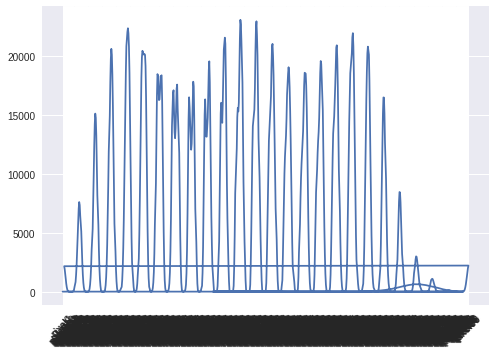

In [10]:
plt.plot((x_train/255.0).sum(axis=0))
plt.xticks(rotation=45)
plt.show()

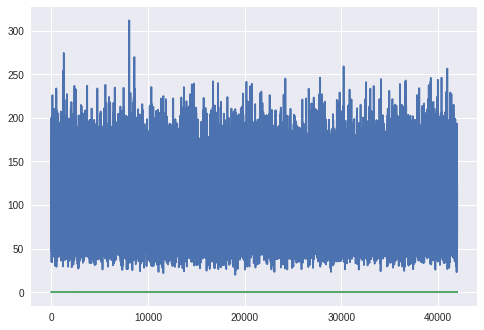

In [11]:
plt.plot((x_train/255.0).sum(axis=1))
plt.plot((x_train/255.0).mean(axis=1))

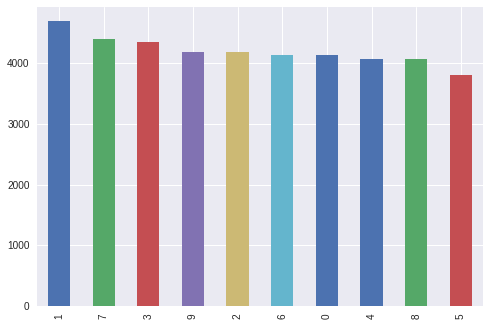

In [12]:
y_train.label.value_counts().plot.bar()

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)

In [14]:
x_train.shape, y_train.shape

((42000, 784), (42000, 10))

In [0]:
x_train = x_train.values.reshape(42000, 28, 28, 1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=42)

In [0]:
from keras.layers import InputLayer, Dense, Activation, ZeroPadding1D, BatchNormalization, Flatten, Conv2D, Input
from keras.layers import AveragePooling2D, MaxPool2D, Dropout
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras import backend as K
from keras.losses import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator

In [0]:
data_gen = ImageDataGenerator(width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
data_gen.fit(X_train)

In [19]:
#  Tensorboard Colab 
! pip install tensorboardcolab

In [20]:
from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
tbcolab = TensorBoardColab()

Wait for 8 seconds...
TensorBoard link:
http://e6ec25d9.ngrok.io


In [0]:
model = Sequential()
model.add(InputLayer(input_shape=(28,28,1)))
model.add(Conv2D(64, (3,3), strides=(1,1), name="Conv2d_1", padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), name="MaxPool_1"))

model.add(Conv2D(64, (3,3), strides=(1,1), name="Conv2d_2", padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), name="MaxPool_2"))

model.add(Conv2D(32, (3,3), strides=(1,1), name="Conv2d_3", padding="same", activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2), name="MaxPool_3"))

model.add(Flatten())
model.add(Dense(64, activation="relu", name="Dense_1"))
model.add(Dropout(0.25))
model.add(Dense(32, activation="relu", name="Dense_2"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax", name="Dense_3"))

In [22]:
"""
In brief, Adagrad performs larger updates for more sparse parameters and smaller updates for less sparse parameter. 
It has good performance with sparse data and training large-scale neural network. 
However, its monotonic learning rate usually proves too aggressive and stops learning too early when training deep neural networks. 
Adadelta is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. 
RMSprop adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. 
Adam is an update to the RMSProp optimizer which is like RMSprop with momentum.
"""

'\nIn brief, Adagrad performs larger updates for more sparse parameters and smaller updates for less sparse parameter. \nIt has good performance with sparse data and training large-scale neural network. \nHowever, its monotonic learning rate usually proves too aggressive and stops learning too early when training deep neural networks. \nAdadelta is an extension of Adagrad that seeks to reduce its aggressive, monotonically decreasing learning rate. \nRMSprop adjusts the Adagrad method in a very simple way in an attempt to reduce its aggressive, monotonically decreasing learning rate. \nAdam is an update to the RMSProp optimizer which is like RMSprop with momentum.\n'

![Learning Rate Comparision](https://cdn-images-1.medium.com/max/1000/1*OjcTfMw6dmOmP4lRE7Ud-A.jpeg)

In [0]:
# STEP DECAY FUNCTION - https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1
# FORMULA =>    lr = lr0 * drop^floor(epoch / epochs_drop)  with SGD

In [0]:
def step_decay(epoch):
  initial_rate= 0.1
  drop = 0.5
  epoch_drop = 3.0
  lrate = initial_rate * math.pow(drop, math.floor((1+ epoch)/epoch_drop))
  return lrate
lrate_ = LearningRateScheduler(step_decay)

In [25]:
# Writing a custom Callback 
"""
As a digression, a callback is a set of functions to be applied at given stages of the training procedure. 
We can use callbacks to get a view on internal states and statistics of the model during training. 
In our example, we create a custom callback by extending the base class keras.callbacks.
Callback to record loss history and learning rate during the training procedure.
"""

'\nAs a digression, a callback is a set of functions to be applied at given stages of the training procedure. \nWe can use callbacks to get a view on internal states and statistics of the model during training. \nIn our example, we create a custom callback by extending the base class keras.callbacks.\nCallback to record loss history and learning rate during the training procedure.\n'

In [0]:
# logs -  dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs={}):
    self.losses = []
    self.acc = []
    self.lr = []
    self.val_loss = []
    self.val_acc = []
    
  def on_epoch_end(self, batch, logs={}):
    self.val_loss.append(logs.get("val_loss"))
    self.losses.append(logs.get("loss"))
    self.acc.append(logs.get("acc"))
    self.val_acc.append(logs.get("val_acc"))
    self.lr.append(step_decay(len(self.losses)))
    # Plot the Loss and Accuracy after every epoch
    f, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(10, 8))
    clear_output(wait=True) #https://gist.github.com/stared/dfb4dfaf6d9a8501cd1cc8b8cb806d2e
    ax1.plot(self.losses, label="Loss")
    ax1.plot(self.val_loss, label="Validation Loss")
    ax1.legend()
    
    ax2.plot(self.acc, label="Accuracy")
    ax2.plot(self.val_acc, label="Validation Accuracy")
    ax2.legend()
    
    plt.show()
loss_history = LossHistory()

In [0]:
model.compile(optimizer=SGD(), loss=categorical_crossentropy, metrics=["acc"])

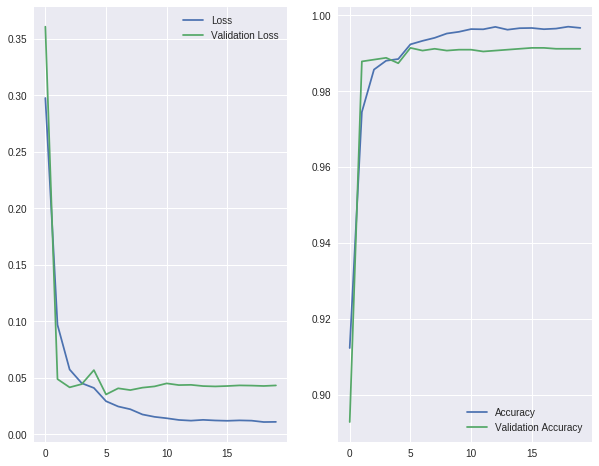

In [28]:
batch = 512
# model_history = model.fit_generator(data_gen.flow(X_train, Y_train, batch_size=batch), 
#                                     steps_per_epoch=X_train.shape[0]/batch, 
#                                     validation_data=(X_val, Y_val), epochs=20, 
#           callbacks=[TensorBoardColabCallback(tbcolab), loss_history, lrate_])
model_history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=20, 
          callbacks=[TensorBoardColabCallback(tbcolab), loss_history, lrate_])

**While at Tensorboard** 

![TensorBoard](https://ibin.co/4NOL3hTd6B0Z.png)


**Lets unwrap the model now**

In [32]:
model.layers

In [0]:
layer_outputs = [layer.output for layer in model.layers]

In [41]:
layer_outputs

[<tf.Tensor 'Conv2d_1/Relu:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_1/cond/Merge:0' shape=(?, 28, 28, 64) dtype=float32>,
 <tf.Tensor 'MaxPool_1/MaxPool:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'Conv2d_2/Relu:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'batch_normalization_2/cond/Merge:0' shape=(?, 14, 14, 64) dtype=float32>,
 <tf.Tensor 'MaxPool_2/MaxPool:0' shape=(?, 7, 7, 64) dtype=float32>,
 <tf.Tensor 'Conv2d_3/Relu:0' shape=(?, 7, 7, 32) dtype=float32>,
 <tf.Tensor 'batch_normalization_3/cond/Merge:0' shape=(?, 7, 7, 32) dtype=float32>,
 <tf.Tensor 'MaxPool_3/MaxPool:0' shape=(?, 3, 3, 32) dtype=float32>,
 <tf.Tensor 'flatten_1/Reshape:0' shape=(?, ?) dtype=float32>,
 <tf.Tensor 'Dense_1/Relu:0' shape=(?, 64) dtype=float32>,
 <tf.Tensor 'dropout_1/cond/Merge:0' shape=(?, 64) dtype=float32>,
 <tf.Tensor 'Dense_2/Relu:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 'dropout_2/cond/Merge:0' shape=(?, 32) dtype=float32>,
 <tf.Tensor 

In [49]:
model.input

<tf.Tensor 'input_1:0' shape=(?, 28, 28, 1) dtype=float32>

In [53]:
test_image = df_test.loc[0].values.reshape(-1, 28, 28, 1)
test_image.shape

(1, 28, 28, 1)

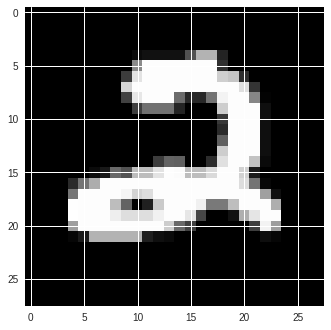

In [70]:
plt.imshow(test_image.reshape((28, 28)), cmap="gray")

In [0]:
model_viz = Model(inputs=model.input, outputs=layer_outputs)

In [0]:
test_image_viz = model_viz.predict(test_image)

In [88]:
print(len(test_image_viz))
for i, j in zip(test_image_viz, layer_outputs):
  print(j.name, " -- ", i.shape)

15
Conv2d_1/Relu:0  --  (1, 28, 28, 64)
batch_normalization_1/cond/Merge:0  --  (1, 28, 28, 64)
MaxPool_1/MaxPool:0  --  (1, 14, 14, 64)
Conv2d_2/Relu:0  --  (1, 14, 14, 64)
batch_normalization_2/cond/Merge:0  --  (1, 14, 14, 64)
MaxPool_2/MaxPool:0  --  (1, 7, 7, 64)
Conv2d_3/Relu:0  --  (1, 7, 7, 32)
batch_normalization_3/cond/Merge:0  --  (1, 7, 7, 32)
MaxPool_3/MaxPool:0  --  (1, 3, 3, 32)
flatten_1/Reshape:0  --  (1, 288)
Dense_1/Relu:0  --  (1, 64)
dropout_1/cond/Merge:0  --  (1, 64)
Dense_2/Relu:0  --  (1, 32)
dropout_2/cond/Merge:0  --  (1, 32)
Dense_3/Softmax:0  --  (1, 10)


In [0]:
def display_activation(test_image_viz, col_size, row_size, index): 
    activation = test_image_viz[index]
    activation_index=0
    print("Shape of output is, ", activation.shape)
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*2.5,col_size*1.5))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

Shape of output is,  (1, 28, 28, 64)


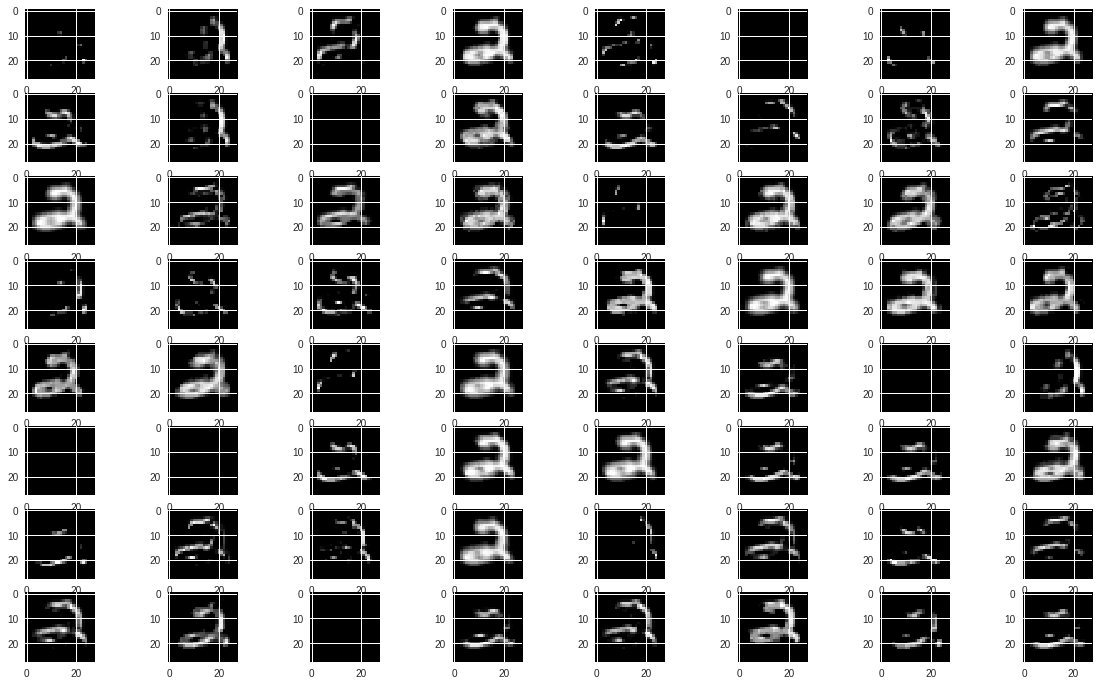

In [87]:
display_activation(test_image_viz, 8,8, 0)

Shape of output is,  (1, 14, 14, 64)


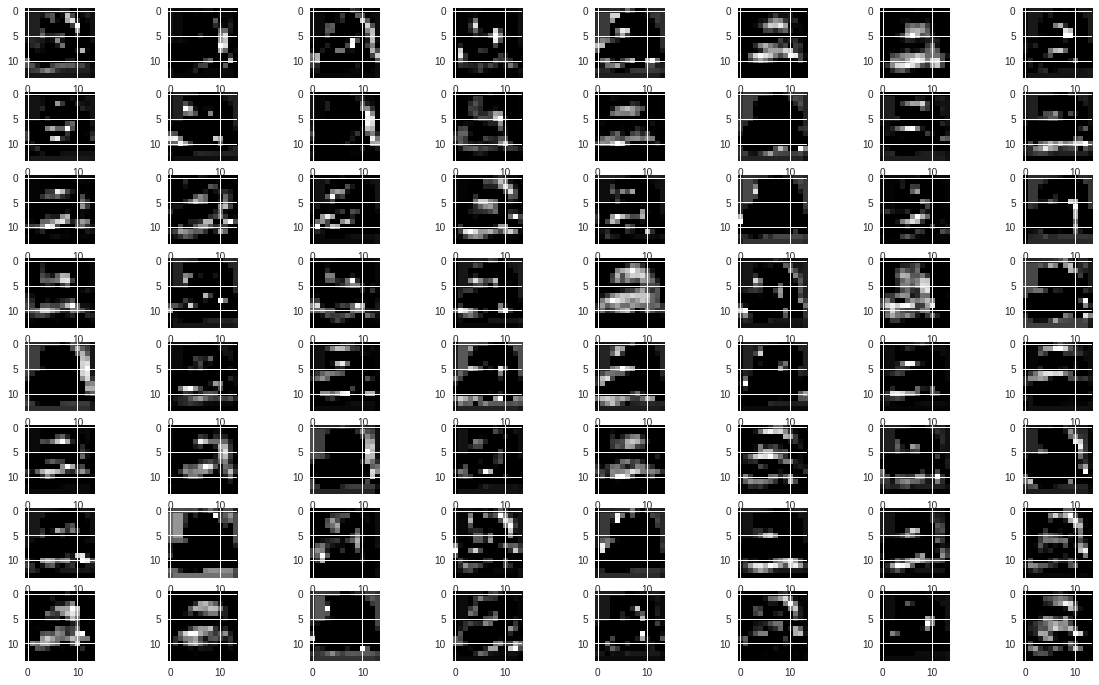

In [89]:
display_activation(test_image_viz, 8,8, 3)

Shape of output is,  (1, 7, 7, 32)


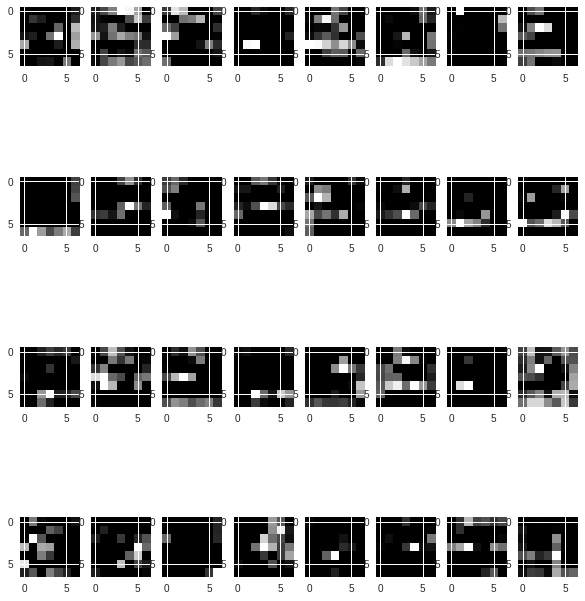

In [91]:
display_activation(test_image_viz, 8, 4, 7)